In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fahmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fahmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fahmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data=pd.read_csv(r"C:\Users\fahmi\OneDrive\Desktop\dataset\Amazone_Reviews.csv",nrows=50000)

In [3]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
49995,49996,B00430B73W,AKW867T7C6HF8,HWJ3,0,0,5,1261180800,Grown to really like them,My sister introduced me to these. They have be...
49996,49997,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...
49997,49998,B00430B73W,A2QH2KF2IAB143,"J. A. Meyers ""Jan""",0,0,5,1257379200,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...
49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...


In [4]:
df=pd.DataFrame(data)

In [5]:
df


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
49995,49996,B00430B73W,AKW867T7C6HF8,HWJ3,0,0,5,1261180800,Grown to really like them,My sister introduced me to these. They have be...
49996,49997,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...
49997,49998,B00430B73W,A2QH2KF2IAB143,"J. A. Meyers ""Jan""",0,0,5,1257379200,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...
49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...


In [6]:
df['Score'].value_counts()

Score
5    31130
4     7288
1     4721
3     4047
2     2814
Name: count, dtype: int64

In [7]:
def map_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['Sentiment'] = df['Score'].apply(map_sentiment)

In [8]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive
...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,B00430B73W,AKW867T7C6HF8,HWJ3,0,0,5,1261180800,Grown to really like them,My sister introduced me to these. They have be...,positive
49996,49997,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...,positive
49997,49998,B00430B73W,A2QH2KF2IAB143,"J. A. Meyers ""Jan""",0,0,5,1257379200,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...,positive
49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...,positive


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(49993, 11)

In [11]:
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [12]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-z\s]','',text)
    words=nltk.word_tokenize(text)
    words=[lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)
df['Cleaned_text']=df['Text'].apply(clean_text)    
    

In [13]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,B00430B73W,AKW867T7C6HF8,HWJ3,0,0,5,1261180800,Grown to really like them,My sister introduced me to these. They have be...,positive,sister introduced become favorite carry around...
49996,49997,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...,positive,friend recommended bar fell love great price e...
49997,49998,B00430B73W,A2QH2KF2IAB143,"J. A. Meyers ""Jan""",0,0,5,1257379200,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...,positive,fabulous take one work every day feel deprived...
49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...,positive,love bar continue buy beware occasionally cont...


In [14]:
x=df['Cleaned_text']
y=df['Sentiment']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.02,random_state=42)


In [15]:
vectorizer=CountVectorizer(max_features=5000)
x_train_vect=vectorizer.fit_transform(x_train)
x_test_vect=vectorizer.fit_transform(x_test)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_vect, y_train)
y_pred=model.predict(x_test_vect)

In [18]:
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred,labels=['positive', 'neutral', 'negative'])

              precision    recall  f1-score   support

    negative       0.18      0.20      0.19       153
     neutral       0.00      0.00      0.00        78
    positive       0.78      0.83      0.80       769

    accuracy                           0.67      1000
   macro avg       0.32      0.34      0.33      1000
weighted avg       0.62      0.67      0.65      1000



In [19]:
cm

array([[640,   1, 128],
       [ 62,   0,  16],
       [122,   0,  31]])

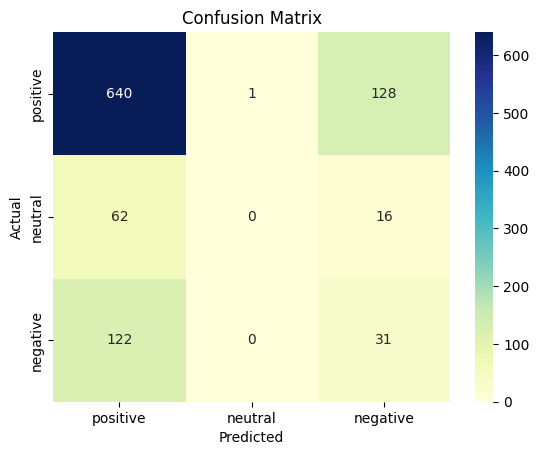

In [25]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['positive', 'neutral', 'negative'],
            yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()